<a href="https://colab.research.google.com/github/sathyanarayanajammala/GenAI/blob/main/M2_AST_2_Introduction_to_HuggingFace_LangChain_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative AI and Prompt Engineering
## A Program by IISc and TalentSprint
### Assignment 2: Introduction to HuggingFace and LangChain

# Learning Objectives

* Connect to OpenAI models using API
* Access models on Hugging Face
* Leverage Langchain to setup LLMs

**Prerequisites:**

1. OpenAI API key
2. Hugging Face API key

Tasks

* OpenAI API key creation (Prerequisite)
* How to use OpenAI models in python (Chat completion)
* Intro to Huggingface models
* Huggingface API key creation (Prerequisite)
* Creating LLM object using Huggingface models
* Intro to Langchain
* Foundational NLP tasks
  *  Text classification
  *  Text similarity
  *  Text sentiment
  *  Text summarization
* Multiple ways to setup LLMs
  * Prompt template using different prompting techniques
  * Converstaional



# Install & Import required modules

In [ ]:
!pip install -qqq langchain langchain_openai langchain_community langchain_huggingface langchain

In [ ]:
import os
from google.colab import userdata
from openai import OpenAI
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_community.llms import HuggingFaceHub
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
from langchain.chains import ConversationChain

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M2_AST_2_Introduction_to_HuggingFace_LangChain_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    ipython.magic("sx curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz")
    ipython.magic("sx tar -xvzf aclImdb_v1.tar.gz")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://genai-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")

# Accessing Keys from ***Secrets*** section

Refer to the [document](https://drive.google.com/file/d/1v09C9I0-O31YMmJ6Zh-FTgo4HB2RiK7z/view?usp=drive_link) to understand the procedure of creating access tokens.

In [ ]:
# Hugging face API Token
HUGGINGFACEHUB_API_TOKEN = userdata.get('HF_TOKEN')
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

# OpenAI API key
OPENAI_API_KEY = userdata.get('OA_API')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

# 1.OpenAI models using API

## API Key creation (Prerequisite)

Steps for Creating an OpenAI API Access Token:

* **Visit the OpenAI Website:**
  * Navigate to the OpenAI website at https://platform.openai.com/.
* **Sign Up or Log In:**
  * If you don’t have an account, click on the “Sign Up” button on the top right corner and complete the registration process. If you already have an account, simply log in.
* **Navigate to API Keys:**
  * Once logged in, click on your profile icon in the top right corner. From the dropdown menu, select "API Keys."
* **Create a New API Key:**
  * In the API Keys section, click on the "Create new secret key" button. This will generate a new API access token.
* **Copy the API Key:**
  * After generating the key, copy it immediately as this is the only time you can view it. If lost, you’ll need to create a new one.
* **Store Your API Key Securely:**
  * Paste and securely store this key in a safe location, such as an environment variable in your application or a password manager.
* **Integrate Your API Key:**
  * Use this key to authenticate API requests in your applications or tools like Postman, Google Colab, etc.
* **Manage Your API Keys:**
  * Return to the API Keys section to manage or revoke keys if needed.


## LLM Object

In [ ]:
#Create LLM object using OpenAI
llm_openai = OpenAI()

## Manage Chat

In [ ]:
# Initialize a list to track the converstaion (Key things are it should be a list of messages and each message should be a dictionay with 2 elements one for 'role' and other for 'content')
# YOUR CODE HERE

# Append the new query
user_input = "Hello, how are you?"
messages.append({"role": "user", "content": user_input})

# Generate the response
# YOUR CODE HERE

# Access the text response
assistant_message = response.choices[0].message.content
print(f'Actual text response: {assistant_message}\n')

# Append the response
# YOUR CODE HERE

## Chat Loop

Enter "**exit**", "**quit**" to end the conversation

In [ ]:
# Initialize the conversation history with a system message
messages = [
    {"role": "system", "content": "You are a helpful assistant."}
]

while True:
    # Get user input
    user_input = input("User: ")
    if user_input.lower() in ["exit", "quit"]:
        break

    # Add user message to the conversation history
    messages.append({"role": "user", "content": user_input})

    # Get the assistant's response
    # YOUR CODE HERE                                             # or model = "gpt-4" if you're using GPT-4

    assistant_message = response.choices[0].message.content

    # Display the assistant's response
    # YOUR CODE HERE

    # Add assistant response to the conversation history
    messages.append({"role": "assistant", "content": assistant_message})


In [ ]:
messages

# 2.Hugging face models

https://huggingface.co/

Hugging Face offers a range of tools and services for working with machine learning models, especially in natural language processing (NLP) and generative AI. summary of Hugging Face offerings:

1. **Model Hub**: Access thousands of pre-trained models for NLP, computer vision, audio, etc. You can search, download, and use these models directly in your projects.

    https://huggingface.co/models


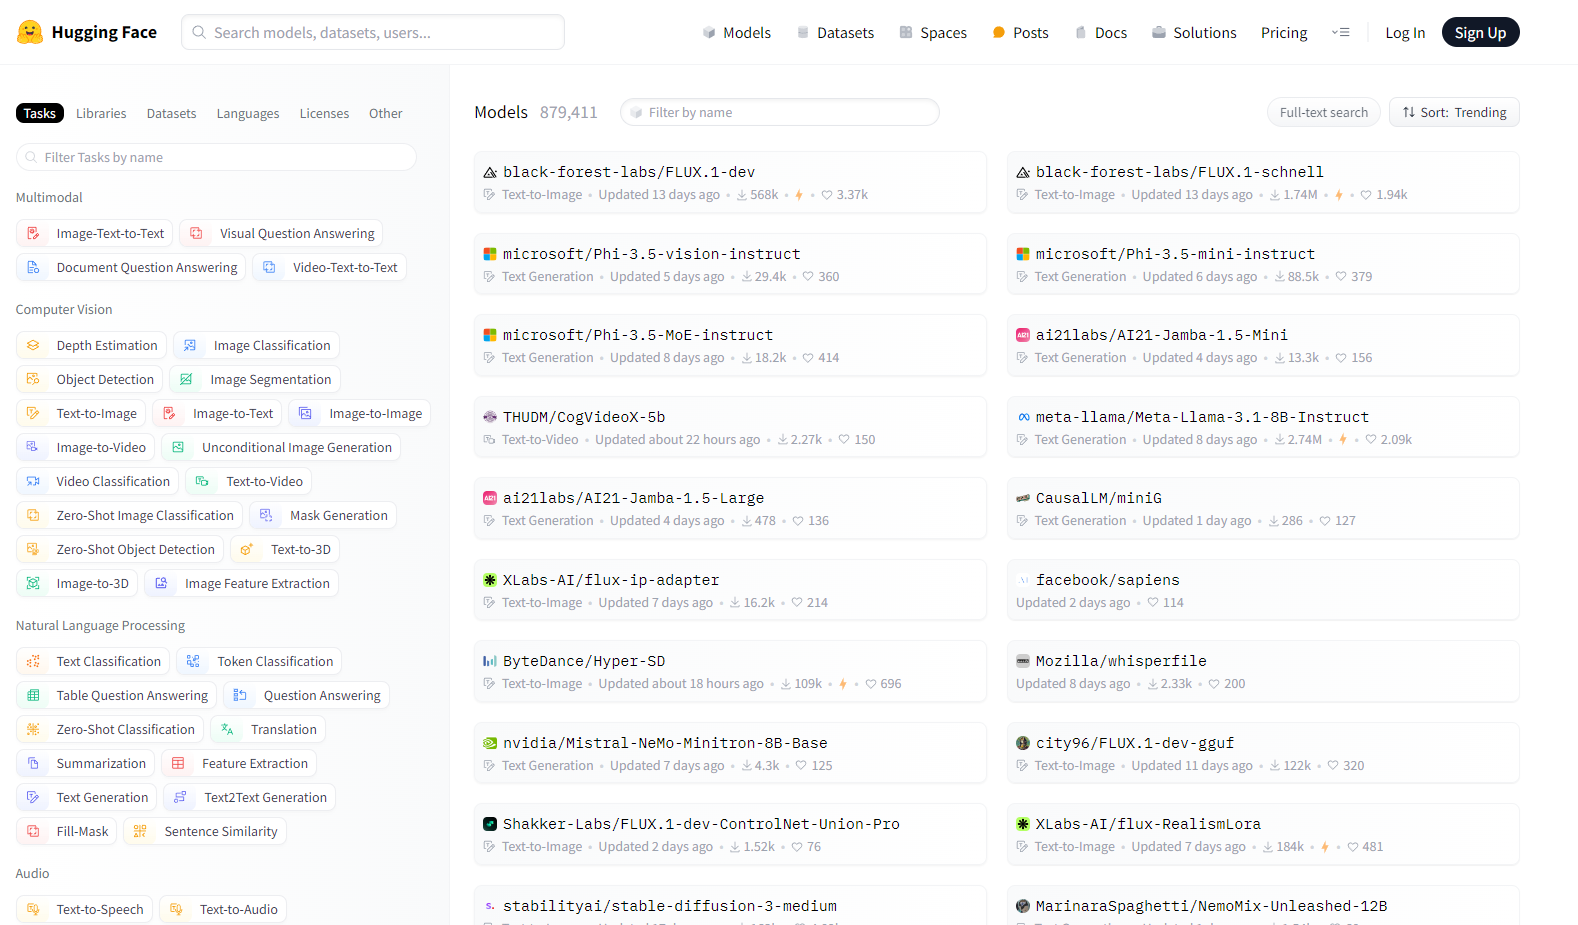

2. **Transformers Library**: Provides easy-to-use APIs for implementing and fine-tuning state-of-the-art models like BERT, GPT, T5, etc., for various tasks (text classification, translation, summarization, etc.).

3. **Datasets Library**: Access a wide range of datasets for training and testing ML models. The library simplifies downloading, processing, and managing datasets.

4. **Training and Fine-tuning**: Train or fine-tune models on custom datasets using Hugging Face's tools like `Trainer` and `Accelerate` for efficient training.

5. **Spaces**: Host, deploy, and share machine learning applications (demos, interactive tools) using Gradio or Streamlit.

6. **Inference API**: Integrate hosted models into applications via API calls, useful for quick deployments without infrastructure management.

7. **Model Evaluation**: Tools for benchmarking and evaluating models to understand performance and suitability for specific tasks.

8. **Community and Collaboration**: Share models, datasets, and spaces with the community; collaborate with others on model development and experiments.

9. **Hub for Custom Models**: Host and share your own models and pipelines, with versioning, card documentation, and Git-based management.

10. **Accelerated Inference and Hardware Support**: Optimize and deploy models on various hardware (CPU, GPU, TPU) for faster inference.

11. **End-to-End Pipelines**: Pre-built pipelines for common tasks (e.g., text classification, named entity recognition) to streamline usage.

These features make Hugging Face a versatile platform for both beginners and advanced users in the GenAI space.

## LLM Object

In [ ]:
# YOUR CODE HERE                        # Get the repo id from Hugging face
llm = HuggingFaceHub(repo_id=repo_id) # For custom model parameters: model_kwargs={"temperature": 0.5, "max_length": 1000}

# 3.Langchain

LangChain is a framework designed to simplify the development of applications that use large language models (LLMs). summary of LangChain offerings:

1. **Prompt Management**: Easily create, manage, and reuse prompts for interacting with language models, allowing consistent and optimized model usage.

  https://js.langchain.com/v0.1/docs/modules/model_io/prompts/

2. **Chains**: Build sequences of calls (chains) to language models or other tools, enabling complex workflows that involve multiple steps, such as generating text, making API calls, or performing calculations.

3. **Agents**: Develop dynamic systems (agents) that can make decisions based on LLM outputs. Agents can autonomously choose actions (like querying a database or searching the web) based on user input or task requirements.

4. **Memory**: Implement memory in LLM applications to retain context across multiple interactions. This is useful for creating more conversational agents or applications that require session-based context.

5. **Data Augmented Generation**: Integrate external data sources to enrich LLM responses. This involves pulling in data from APIs, databases, or custom knowledge bases to enhance the information the model can leverage.

6. **Tool Integration**: Seamlessly integrate various tools and APIs (e.g., calculators, search engines) to extend the capabilities of LLMs beyond text generation.

7. **LLM Orchestration**: Coordinate and manage multiple LLMs, each fine-tuned for specific tasks, to create a more powerful and capable system.

8. **Customizable Components**: Develop custom modules for specific needs (e.g., custom prompt templates, data loaders, output parsers) to tailor the framework for unique applications.

9. **Evaluation and Testing**: Provides tools to evaluate the performance of LLM-based applications, allowing developers to optimize and refine their systems.

10. **Deployment Options**: Supports deployment to various environments, including cloud platforms, local servers, and more, providing flexibility in how applications are run and scaled.

11. **Community and Ecosystem**: Leverage a growing ecosystem of pre-built integrations, templates, and community-contributed components, making it easier to build advanced applications quickly.

LangChain is ideal for building sophisticated, production-ready LLM applications by providing tools that handle everything from prompt engineering to decision-making and deployment.

## 3.1.OpenAI & Langchain

In [ ]:
# Create LLM object using ChatOpenAI from langchain
llm = ChatOpenAI(model_name="gpt-3.5-turbo")

#Get response from LLM
# User message - 1
# YOUR CODE HERE

In [ ]:
# User message - 2
response = llm.invoke('what a good day to be talking to you!')
response.content

In [ ]:
# User message - 3
response = llm.invoke('what was my first message?')
response.content

Cannot really say if the response is right, let us test it with second question1

In [ ]:
#User message - 4
response = llm.invoke('what was my second message?')
# YOUR CODE HERE

Here it is clear that earlier it was hallucinating. Infact in the way we are using the LLM right now, it does not have access to the history of conversations, right now it is answering one question at a time which is how the original LLMs actually work, we need to create a pipeline inorder to use it like a chat, we will see it in the next sections

## 3.2.Langchain Methods

### Invoke

In [ ]:
response = llm.invoke('What are the possible number of combinations while shufling a deck of cards')
response.content

### Prompt Template

In [ ]:
template = """
for the numbers sent as input, add them and return the output
Inputs:{input1},{input2}
Output: input1 + input2
"""

# YOUR CODE HERE                            # Initialize prompt template and invoke the response

### Conversational

In [ ]:
# now initialize the conversation chain
conversation = ConversationChain(llm=llm)

In [ ]:
response = conversation('Hi')

print(f"Current Response: {response['response']}")

# YOUR CODE HERE                 # Display response history

In [ ]:
response = conversation('Why is it difficult to explore the oceans?')

print(f"Current Response: {response['response']}")

print(f"History: {response['history']}")

In [ ]:
response = conversation('Why is it difficult to explore the space?')

print(f"Current Response: {response['response']}")

# YOUR CODE HERE                 # Display response history

## 3.3.Hugging Face models & Langchain

In [ ]:
hf=HuggingFaceHub(repo_id="microsoft/Phi-3-mini-4k-instruct")
query="What is the health insurance coverage?"
hf.invoke(query)

In [ ]:
hf=HuggingFaceHub(repo_id="mistralai/Mistral-7B-Instruct-v0.2")
query="What is the health insurance coverage?"
hf.invoke(query)

In [ ]:
# YOUR CODE HERE                 # Define the template

prompt = PromptTemplate.from_template(template)

chain = prompt | hf

question = "What is electroencephalography?"

# YOUR CODE HERE                 # Use chain.invoke for the question

## 3.4.NLP Tasks

### Classification

In [ ]:
llm = ChatOpenAI(model_name="gpt-4-turbo", temperature=0.0)

template = """Given the user_input: {user_input} classify it into one of the following three buckets

Buckets List:
1Credit Card Information
2Forex Transactions
3Loan Query

Response: Return the bucket Name and Number
"""

user_input = "Hi i'm looking to connect with someone to understand if i can make purchases on my credit card during my upcoming international trip"

# YOUR CODE HERE                 # Create a prompt template and invoke the response from the chain

### Question Answering

In [ ]:
template = """Consider the following information and answer the input_question: {user_input}

Bristol-Myers Squibb
 CEO Chris Boerner detailed the pharmaceutical giant’s bundle of recent acquisitions in a Monday interview with CNBC’s Jim Cramer, and indicated the company is in a transformative stage.

“We are writing the next chapter of this company,” Boerner said. “And we’ve got real financial strength that has enabled us to go and actually bring innovation in to the company from outside. And that’s what we’ve done with these most recent deals.”

Bristol-Myers Squibb announced three multi-billion-dollar acquisitions towards the end of 2023. The company plans to buy RayzeBio
 and Mirati Therapeutics
, both of which are known for cancer drugs. It also intends to buy Karuna Therapeutics
, which develops medications to treat neurological and psychiatric conditions.

Boerner expressed particular excitement about its deal with Karuna, saying the company wants to “accelerate” its business in neuropsychology. Karuna’s new medication, KarXT, is expected to treat schizophrenia as well as psychosis in Alzheimer’s patients.

According to Boerner, the the drug is unique because it has shown high efficacy without some of the side effects of other antipsychotic drugs, such as weight gain.

“We believe commercially they’re attractive opportunities, and, as I said, real potential is not just in neuropsych,” he said. “It’s that bridge to neurodegeneration, and, you know, we’re on the potential upswing of being able to provide really meaningful improvements in the lives of patients with Alzheimer’s disease.”

Response: Return the appropriate response to the input question
"""

user_input = "what is the article about"

# YOUR CODE HERE                 # Create a prompt template and invoke the response from the chain

### Summarization

In [ ]:
template = """Consider the following_information: {user_input} and summarize it in simple and brief ways
Response: Return the appropriate summary for the input text, rephrase if necessary
"""

user_input = """
Samsung Electronics on Tuesday said it expects to post a 35% drop in operating profit in the fourth quarter of 2023, missing expectations by a wide margin as a rebound in semiconductor prices likely narrowed losses in the South Korean company’s biggest profit-driving segment.
Samsung said that for the October-December quarter, operating profit is likely to be 2.8 trillion South Korean won ($2.13 billion), down 35% from the same period a year ago where the firm reported an operating profit of 4.31 trillion won. Operating profit was 2.43 trillion won in the previous quarter.
The profit guidance fell far short of LSEG’s SmartEstimate of 3.7 trillion won, which is weighted more heavily toward expectations of analysts who have been consistently more accurate.
Fourth-quarter revenue likely fell 4.9% from the same period a year ago to 67 trillion won, the firm said in a preliminary earnings statement.
Samsung is the world’s largest maker for dynamic random-access memory chips which are found in consumer devices such as smartphones and computers.
″[Samsung is] very good at making some of the best semiconductors in the world, at least in making them and getting them done. But their yields are so much worse than competitors like TSMC,” said Cory Johnson, chief market strategist at The Futurum Group, on Tuesday.
"""

# YOUR CODE HERE                 # Create a prompt template and invoke the response from the chain

### Similarity

In [ ]:
template = """
Consider the sentence_1: {user_input1} and sentence_2: {user_input2} generate a similarity score between the
given sentences and let the score be between -1 and 1 where -1 means negative similarity and 1 means positive similarity
and 0 indicates no similarity

Response: return the similarity score and also a reasoning if possible
"""

user_input1 = """
i think the user wants to raise a ticket under IT
"""

user_input2 = """
by what the user is saying it looks like the ticket might have to go to IT
"""

# YOUR CODE HERE                 # Create a prompt template and invoke the response from the chain

### Sentiment

In [ ]:
template = """
Consider the input_sentence: {user_input1}, please look at the sentence and comeup with sentiment class and sentiment score for the same

Response: return the sentiment class and sentiment score, include reasoning if possible
"""
# YOUR CODE HERE                 # Create a prompt template

In [ ]:
sentences = ["there is a shortage of capital, and we need extra financing",
             "growth is strong and we have plenty of liquidity",
             "there are doubts about our finances",
             "profits are flat"]

In [ ]:
[print(llm_chain.invoke({'user_input1':user_input1}).content) for user_input1 in sentences]

# Please answer the questions below to complete the experiment:




In [ ]:
#@title What is Model Hub on Hugging Face? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "A platform for model deployment", "A repository of pre-trained models", "A data visualization tool", "An API management platform"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}

In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]

In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")